# Introduccion a Python  - Actividad Anàlisis Estadistico de Datos del Poluciòn de Valencia 

**Nombre:**     Antonio J. Bonafede S.

**URL:**        "https://valencia.opendatasoft.com/api/explore/v2.1/catalog/datasets/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/records"

**Solución:**   https://github.com/bonafedeaviu/Valencia

## Importar las librerias

In [1]:
from os import path
import sys
import platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from scipy.stats import shapiro, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.api import OLS

import folium
from folium.plugins import HeatMap


C:\Users\bonaf\anaconda3\envs\mi_entorno_310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Mostrar las versiones del entorno de trabajo

In [2]:
import subprocess
import matplotlib
import scipy
import sklearn
import statsmodels


print("Versiones del entorno:")
print(f"Python: {platform.python_version()}")
result = subprocess.run(['conda', '--version'], capture_output=True, text=True, check=True)
print("Anaconda version:", result.stdout.strip())

print("\nVersiones de librerías:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"statsmodels: {statsmodels.__version__}")

Versiones del entorno:
Python: 3.10.16
Anaconda version: conda 25.1.1

Versiones de librerías:
pandas: 2.2.3
numpy: 2.1.3
matplotlib: 3.10.3
seaborn: 0.13.2
scipy: 1.15.3
scikit-learn: 1.6.1
statsmodels: 0.14.4


## Estructura de los Datos

<img src="imagenes/dataset_structure.jpg" width="300"/>

## Cargar los datos bajados de la URL
**Fechas:** 
  - Este dataset fue tomado entre e 09/06/2025 y el 11/06/20205 completando 24 horas de observacion ( 1 por cada hora ).
    
**Nota:** 
  - La razon es que hubieron varios incidentes durante la captura de información del URL que detuvieron el programa hasta que se volvia a activar dese      el punto en que habia quedado.

In [3]:
path_csv = ['res', 'valencia_pollution_dataset_alt.csv']
path_csv_solved = path.join(*path_csv)
df = pd.read_csv(path_csv_solved)
df

,objectid,nombre,direccion,tipozona,so2,no2,o3,co,pm10,pm25,tipoemisio,fecha_carg,calidad_am,fiwareid,geo_point_2d
0,19,Centro,VALÈNCIA CENTRE,Urbana,NaN,14.0,NaN,NaN,28.0,16.0,Tráfico,2025-06-09T13:00:00+00:00,Razonablemente Buena,A07_VALENCIACENTRE_60m,"{'lon': -0.37639765165532396, 'lat': 39.470547..."
1,21,Olivereta,OLIVERETA,Urbana,NaN,34.0,NaN,NaN,28.0,17.0,Tráfico,2025-06-09T13:00:00+00:00,Razonablemente Buena,A10_OLIVERETA_60m,"{'lon': -0.40592344552906795, 'lat': 39.469244..."
2,22,Patraix,PATRAIX,Urbana,NaN,2.0,NaN,NaN,27.0,16.0,Tráfico,2025-06-08T15:00:00+00:00,Razonablemente Buena,A11_PATRAIX_60m,"{'lon': -0.4014113292191286, 'lat': 39.4591890..."
3,16,Pista de Silla,PISTA DE SILLA,Urbana,2.0,14.0,43.0,0.0,41.0,18.0,Tráfico,2025-06-09T13:00:00+00:00,Regular,A04_PISTASILLA_60m,"{'lon': -0.37664393657915707, 'lat': 39.458060..."
4,12,Dr. Lluch,DR.LLUCH,Urbana,NaN,11.0,NaN,NaN,21.0,11.0,Tráfico,2025-06-09T13:00:00+00:00,Razonablemente Buena,A08_DR_LLUCH_60m,"{'lon': -0.3282894894027388, 'lat': 39.4666847..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,Pista de Silla,PISTA DE SILLA,Urbana,1.0,13.0,61.0,0.0,30.0,18.0,Tráfico,2025-06-11T04:00:00+00:00,Razonablemente Buena,A04_PISTASILLA_60m,"{'lon': -0.37664393657915707, 'lat': 39.458060..."
271,17,Universidad Politécnica,POLITÈCNIC,Suburbana,4.0,24.0,53.0,NaN,25.0,15.0,Fondo,2025-06-11T04:00:00+00:00,Razonablemente Buena,A05_POLITECNIC_60m,"{'lon': -0.33740066052186946, 'lat': 39.479644..."
272,18,Viveros,VIVERS,Urbana,0.0,13.0,65.0,NaN,NaN,NaN,Fondo,2025-06-11T04:00:00+00:00,Razonablemente Buena,A06_VIVERS_60m,"{'lon': -0.36964822314381013, 'lat': 39.479640..."
273,19,Centro,VALÈNCIA CENTRE,Urbana,NaN,16.0,NaN,NaN,29.0,17.0,Tráfico,2025-06-11T04:00:00+00:00,Razonablemente Buena,A07_VALENCIACENTRE_60m,"{'lon': -0.37639765165532396, 'lat': 39.470547..."


## Descripcion de los contaminantes registrados

<img src="imagenes/contaminantes.jpg" width="900"/>

## Tratamiento y Transformación de Datos
**Propósito:** 
  - Limpieza y preparación de datos para evitar errores en los análisis.
    
**Qué observar:** 
  - Corrección de valores nulos y atípicos.<br> 
  - Conversion Numerica.<br>
  - Valores faltantes-.<br> 
  - Normalización y transformación de variables para mejorar interpretabilidad.<br> 
  - Conversión de fechas y datos categóricos en formatos adecuados.<br> 


In [4]:
## --- Tratamiento y Transformación de Datos --- ###

def tratamiento_datos(df):
    # Reemplazar 'N/A' con NaN para facilitar la imputación
    df.replace("N/A", np.nan, inplace=True)

    # Definir las columnas numéricas
    columnas_numericas = ['so2', 'no2', 'o3', 'co', 'pm10', 'pm25']

    # Convertir valores numéricos correctamente
    df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

    # Imputación de valores faltantes por la media dentro de cada 'tipozona'
    for col in columnas_numericas:
        if col in df.columns:  # Verificación para evitar errores si falta alguna columna
            df[col] = df[col].fillna(df.groupby('tipozona')[col].transform("mean"))


    df['geo_point_2d'] = df['geo_point_2d'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)  # Convertir cadenas a diccionarios
 
    # Separar latitud y longitud en columnas individuales
    df['lat'] = df['geo_point_2d'].apply(lambda x: x['lat'] if isinstance(x, dict) else None)
    df['lon'] = df['geo_point_2d'].apply(lambda x: x['lon'] if isinstance(x, dict) else None)

    # Normalización de contaminantes (Comnatariado para porder realizar estadisticas con los datos reales)
    #scaler = StandardScaler()
    #df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

    # Conversión de fecha para análisis temporal
    df["fecha_carg"] = pd.to_datetime(df["fecha_carg"])

    return df

df = tratamiento_datos(df)

# Verificando datos limpios
print(df.head())
df

   objectid          nombre        direccion tipozona   so2   no2     o3   co  \
0        19          Centro  VALÈNCIA CENTRE   Urbana  2.27  14.0  56.19  0.0   
1        21       Olivereta        OLIVERETA   Urbana  2.27  34.0  56.19  0.0   
2        22         Patraix          PATRAIX   Urbana  2.27   2.0  56.19  0.0   
3        16  Pista de Silla   PISTA DE SILLA   Urbana  2.00  14.0  43.00  0.0   
4        12       Dr. Lluch         DR.LLUCH   Urbana  2.27  11.0  56.19  0.0   

   pm10  pm25 tipoemisio                fecha_carg            calidad_am  \
0  28.0  16.0    Tráfico 2025-06-09 13:00:00+00:00  Razonablemente Buena   
1  28.0  17.0    Tráfico 2025-06-09 13:00:00+00:00  Razonablemente Buena   
2  27.0  16.0    Tráfico 2025-06-08 15:00:00+00:00  Razonablemente Buena   
3  41.0  18.0    Tráfico 2025-06-09 13:00:00+00:00               Regular   
4  21.0  11.0    Tráfico 2025-06-09 13:00:00+00:00  Razonablemente Buena   

                 fiwareid                               

,objectid,nombre,direccion,tipozona,so2,no2,o3,co,pm10,pm25,tipoemisio,fecha_carg,calidad_am,fiwareid,geo_point_2d,lat,lon
0,19,Centro,VALÈNCIA CENTRE,Urbana,2.27,14.0,56.19,0.0,28.000000,16.000000,Tráfico,2025-06-09 13:00:00+00:00,Razonablemente Buena,A07_VALENCIACENTRE_60m,"{'lon': -0.37639765165532396, 'lat': 39.470547...",39.470548,-0.376398
1,21,Olivereta,OLIVERETA,Urbana,2.27,34.0,56.19,0.0,28.000000,17.000000,Tráfico,2025-06-09 13:00:00+00:00,Razonablemente Buena,A10_OLIVERETA_60m,"{'lon': -0.40592344552906795, 'lat': 39.469244...",39.469244,-0.405923
2,22,Patraix,PATRAIX,Urbana,2.27,2.0,56.19,0.0,27.000000,16.000000,Tráfico,2025-06-08 15:00:00+00:00,Razonablemente Buena,A11_PATRAIX_60m,"{'lon': -0.4014113292191286, 'lat': 39.4591890...",39.459189,-0.401411
3,16,Pista de Silla,PISTA DE SILLA,Urbana,2.00,14.0,43.00,0.0,41.000000,18.000000,Tráfico,2025-06-09 13:00:00+00:00,Regular,A04_PISTASILLA_60m,"{'lon': -0.37664393657915707, 'lat': 39.458060...",39.458061,-0.376644
4,12,Dr. Lluch,DR.LLUCH,Urbana,2.27,11.0,56.19,0.0,21.000000,11.000000,Tráfico,2025-06-09 13:00:00+00:00,Razonablemente Buena,A08_DR_LLUCH_60m,"{'lon': -0.3282894894027388, 'lat': 39.4666847...",39.466685,-0.328289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,Pista de Silla,PISTA DE SILLA,Urbana,1.00,13.0,61.00,0.0,30.000000,18.000000,Tráfico,2025-06-11 04:00:00+00:00,Razonablemente Buena,A04_PISTASILLA_60m,"{'lon': -0.37664393657915707, 'lat': 39.458060...",39.458061,-0.376644
271,17,Universidad Politécnica,POLITÈCNIC,Suburbana,4.00,24.0,53.00,0.0,25.000000,15.000000,Fondo,2025-06-11 04:00:00+00:00,Razonablemente Buena,A05_POLITECNIC_60m,"{'lon': -0.33740066052186946, 'lat': 39.479644...",39.479644,-0.337401
272,18,Viveros,VIVERS,Urbana,0.00,13.0,65.00,0.0,27.988571,15.182857,Fondo,2025-06-11 04:00:00+00:00,Razonablemente Buena,A06_VIVERS_60m,"{'lon': -0.36964822314381013, 'lat': 39.479640...",39.479641,-0.369648
273,19,Centro,VALÈNCIA CENTRE,Urbana,2.27,16.0,56.19,0.0,29.000000,17.000000,Tráfico,2025-06-11 04:00:00+00:00,Razonablemente Buena,A07_VALENCIACENTRE_60m,"{'lon': -0.37639765165532396, 'lat': 39.470547...",39.470548,-0.376398


## Análisis Estadístico Básico

**Propósito:** 
- Describir los datos y entender su distribución.

**Qué observar:**
- Tendencias centrales (media, mediana, moda).
- Variabilidad (desviación estándar, rangos intercuartílicos).
- Distribución de los contaminantes (histogramas, pruebas de normalidad).

         objectid         so2         no2          o3     co        pm10  \
count  275.000000  275.000000  275.000000  275.000000  275.0  275.000000   
mean    17.000000    2.570000   16.796364   57.155455    0.0   27.783377   
std      3.168043    1.389172   13.098531    6.229013    0.0    4.078653   
min     12.000000    0.000000    2.000000   37.000000    0.0   19.000000   
25%     14.000000    2.000000    7.000000   56.190000    0.0   26.000000   
50%     17.000000    2.270000   12.000000   56.190000    0.0   27.988571   
75%     20.000000    3.000000   24.000000   60.000000    0.0   29.000000   
max     22.000000    7.000000   60.000000   77.000000    0.0   41.000000   

             pm25         lat         lon  
count  275.000000  275.000000  275.000000  
mean    14.895065   39.467885   -0.370217  
std      2.321467    0.009942    0.029923  
min      9.000000   39.450396   -0.408810  
25%     14.000000   39.458061   -0.401411  
50%     15.182857   39.469244   -0.376398  
75%    

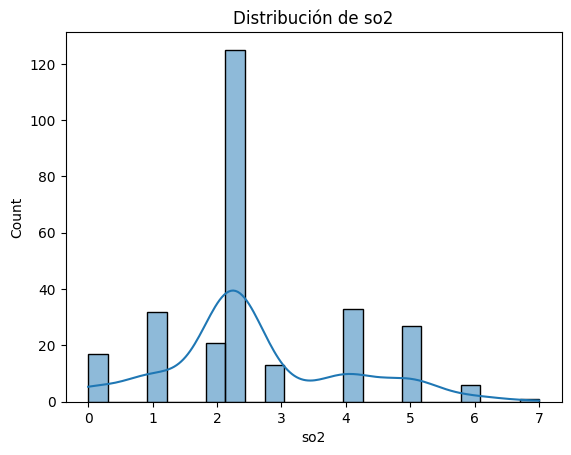

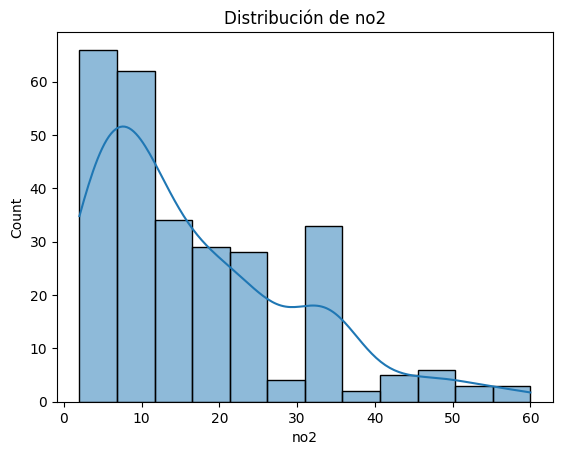

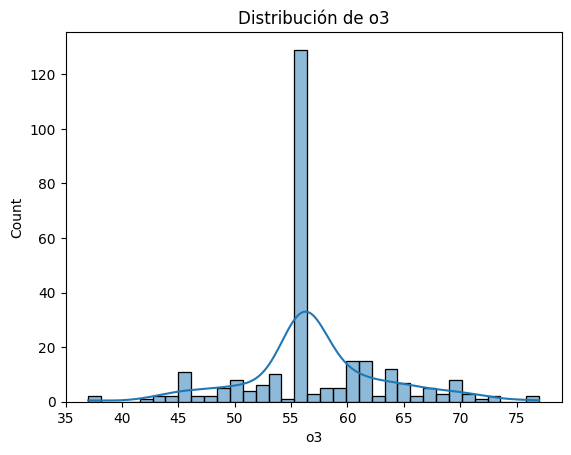

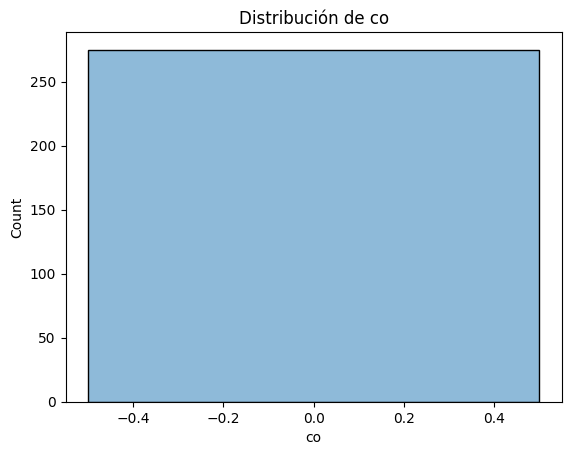

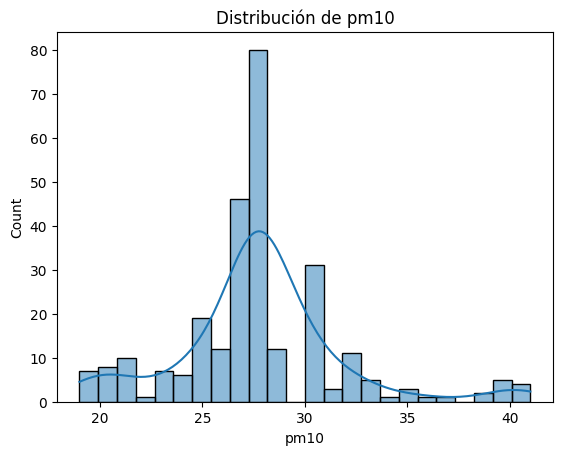

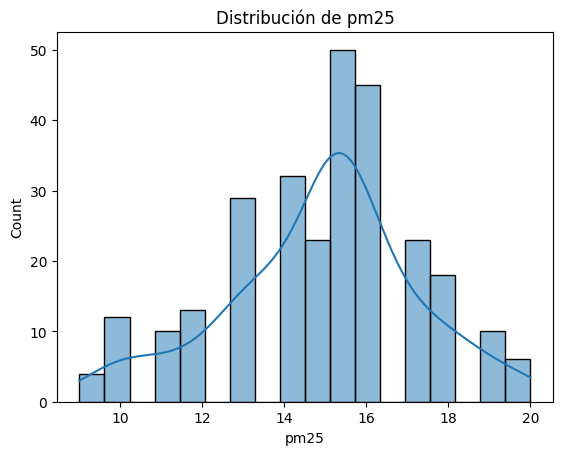

In [5]:
### --- 2. Análisis Estadístico Básico --- ###
def analisis_estadistico(df):
    print(df.describe())
    for col in ['so2', 'no2', 'o3', 'co', 'pm10', 'pm25']:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribución de {col}")
        plt.show()

analisis_estadistico(df)

## Analisis Preliminar

-  **SO2 (Dióxido de Azufre):** La distribución multimodal (picos alrededor de 0, 1, 2.5, 4, 5) sugiere que las fuentes de SO2 pueden ser diversas (por ejemplo, emisiones industriales, tráfico, calefacción) y/o que existen diferentes regímenes de dispersión atmosférica que resultan en concentraciones agrupadas. El valor mínimo de 0.0 es esperable en zonas con baja actividad industrial o tráfico pesado.
 
-  **NO2 (Dióxido de Nitrógeno):** La fuerte asimetría positiva y la concentración de valores bajos con una cola larga hacia valores altos (hasta 60) son típicas de contaminantes primarios del tráfico vehicular y la combustión. La mayoría del tiempo, los niveles son bajos, pero hay picos ocasionales que pueden ser significativos, indicando episodios de alta contaminación o mediciones cerca de fuentes intensas.
  
-  **O3 (Ozono Troposférico):** La distribución extremadamente concentrada alrededor de 56.19 es muy inusual para un contaminante atmosférico que se forma secundariamente. Esto podría indicar:
Valores de Referencia o Umbrales: Podría ser un valor de referencia, un umbral de calidad del aire, o un valor imputado. Es crucial investigar si este valor es un artefacto del proceso de medición o de la gestión de datos.
Estabilidad en Condiciones Específicas: Si es un valor real, podría significar que bajo las condiciones predominantes en el área de estudio, los niveles de ozono tienden a estabilizarse en esa concentración. Sin embargo, la falta de variabilidad es sospechosa.

-  **CO (Monóxido de Carbono):** El hecho de que todos los valores sean 0.0 significa que el CO no está siendo medido, o no se detecta, o los datos están ausentes/imputados a cero. Para un contaminante asociado a la combustión incompleta (tráfico, calefacción), esto es atípico y sugiere que la columna de CO podría no ser útil para el análisis o que hay un problema con la recolección de datos de CO.

-  **PM10 y PM2.5 (Material Particulado):** Ambas distribuciones muestran concentraciones en rangos esperados para material particulado.

## Análisis de Regresión

**Propósito:** 
-  Identificar relaciones entre variables (cómo un contaminante afecta otro).
  
**Qué observar:**
-  Significancia de coeficientes (¿qué contaminantes afectan más la calidad del aire?).
-  Grado de ajuste del modelo (R², errores estándar).
-  Si la relación es lineal o requiere ajustes más complejos.

In [6]:
### --- 3. Análisis de Regresión --- ###
def analisis_regresion(df):
    X = df[['so2', 'no2', 'o3', 'co', 'pm10']]
    y = df['pm25']
    
    model = LinearRegression()
    model.fit(X, y)

    print("Coeficientes de regresión:", model.coef_)
    print("Intercepto:", model.intercept_)

analisis_regresion(df)

Coeficientes de regresión: [-0.23577893  0.01951455 -0.01459519  0.          0.38355031]
Intercepto: 5.351115476992138


## Conclusiones Generales de la Regresión:

-  **PM10 es el predictor más influyente:** Basado en la magnitud de los coeficientes, PM10 es el contaminante que tiene el mayor impacto positivo en la predicción de PM2.5. Esto es coherente con la definición de PM2.5 como una fracción de PM10.
  
-  **Relaciones esperadas y no esperadas:** La relación positiva con NO₂ es esperada. Las relaciones negativas con SO₂ y O₃ son menos intuitivas y merecen una investigación más profunda, posiblemente explorando interacciones entre contaminantes o la influencia de otras variables no incluidas en el modelo.

-  **CO es irrelevante:** La columna de CO no contribuye al modelo debido a su falta de variabilidad.

## ANOVA (Análisis de Varianza)

**Propósito:** 
-  Comparar contaminación entre distintas zonas o condiciones.
  
**Qué observar:**
-  Si hay diferencias estadísticamente significativas entre grupos.
-  Resultados del test ANOVA (p-values < 0.05 indican diferencias reales).

In [7]:
### --- 4. ANOVA (Análisis de Varianza) --- ###
def anova(df):
    for cont in ['so2', 'no2', 'o3', 'pm10', 'pm25']: # se elimiina co por no tener valores registrados
        grupos = [df[df['tipozona'] == tipo][cont] for tipo in df['tipozona'].unique()]
        resultado = f_oneway(*grupos)
        print(f"Resultado ANOVA para el contaminante {cont} es :", resultado)

anova(df)

Resultado ANOVA para el contaminante so2 es : F_onewayResult(statistic=np.float64(72.84643858262059), pvalue=np.float64(9.876377844087762e-16))
Resultado ANOVA para el contaminante no2 es : F_onewayResult(statistic=np.float64(0.9857555096004116), pvalue=np.float64(0.32166116181419335))
Resultado ANOVA para el contaminante o3 es : F_onewayResult(statistic=np.float64(33.224607097532946), pvalue=np.float64(2.2148738809714305e-08))
Resultado ANOVA para el contaminante pm10 es : F_onewayResult(statistic=np.float64(3.15681888650675), pvalue=np.float64(0.07672390444676663))
Resultado ANOVA para el contaminante pm25 es : F_onewayResult(statistic=np.float64(20.36255290643255), pvalue=np.float64(9.530950787011651e-06))


## Conclusión General del Análisis de Varianza:

-  Podemos concluir que el tipozona tiene un impacto estadísticamente significativo en los niveles promedio de SO₂, O₃ y PM2.5. Esto sugiere que las características o condiciones asociadas a cada tipo de zona influyen de manera diferente en las concentraciones de estos contaminantes.

-  Por otro lado, para NO₂ y PM10, no se encontró evidencia estadística suficiente para afirmar que la tipozona cause diferencias significativas en sus niveles promedio. Esto podría indicar que las fuentes o la dispersión de estos contaminantes son más uniformes entre las zonas, o que otros factores no considerados en este ANOVA son más dominantes.

## Matriz de Correlación

**Propósito:** 

-  Evaluar la relación entre los diferentes contaminantes medidos.

**Qué observar:**

-  Magnitud de la correlación (valores cercanos a 1 o -1 indican alta correlación positiva o negativa, respectivamente).

-  Identificar posibles redundancias o dependencias entre variables.

-  Detectar asociaciones inesperadas que puedan requerir análisis adicional.

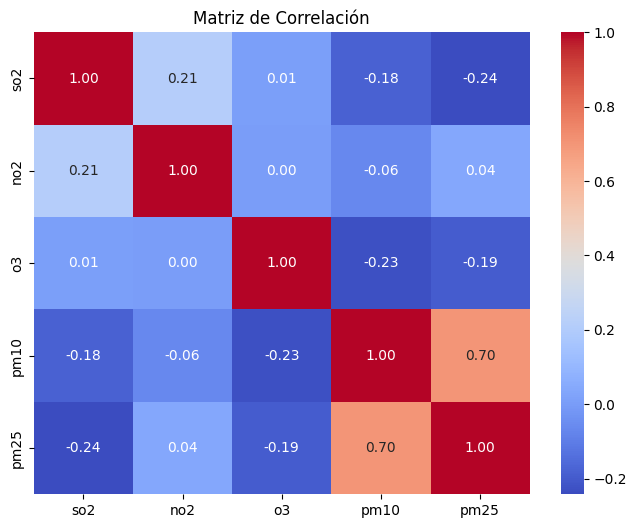

In [8]:
# Matriz de correlación
corr_matrix = df[['so2', 'no2', 'o3', 'pm10', 'pm25']].corr() # Dado que es 0 se elimina co

# Visualizar correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Conclusiónes Generales de la Matriz de Correlación:

1.  **PM10 y PM2.5: Correlación Fuerte Positiva (0.70)**
Esta es la correlación más fuerte y positiva observada. Es altamente esperada y lógica, ya que PM2.5 (partículas menores de 2.5 micras) es una fracción de PM10 (partículas menores de 10 micras). Un aumento en las partículas más grandes (PM10) está fuertemente asociado con un aumento en las partículas más finas (PM2.5). Esto valida la consistencia de los datos y la relación física entre estos dos contaminantes.

2.  **SO₂ y NO₂: Correlación Positiva Débil (0.21)**
Existe una correlación positiva débil entre SO₂ y NO₂. Ambos son contaminantes primarios que a menudo provienen de la quema de combustibles fósiles (tráfico, industria, generación de energía). Una correlación débil sugiere que, aunque pueden compartir algunas fuentes, su presencia no está fuertemente ligada en este conjunto de datos, o que otros factores (como la dispersión atmosférica o la ubicación de las fuentes) influyen de manera diferente en sus concentraciones.

3.  **O₃ con PM10 y PM2.5: Correlación Negativa Moderada (-0.23 y -0.19 respectivamente)**
El ozono (O₃) muestra una correlación negativa moderada con PM10 (-0.23) y una correlación negativa débil con PM2.5 (-0.19). Esto es interesante. El ozono es un contaminante secundario que se forma en presencia de luz solar y precursores (NOx y COVs). Las partículas (PM10, PM2.5) pueden reducir la radiación solar que llega a la superficie, lo que podría inhibir la formación de ozono. Además, en algunas reacciones químicas, los NOx pueden reaccionar con el ozono, reduciendo su concentración. Esta relación inversa puede ser compleja y multifactorial.

4.  **SO₂ con PM10 y PM2.5: Correlación Negativa Débil (-0.18 y -0.24 respectivamente)**
SO₂ muestra una correlación negativa débil con PM10 (-0.18) y PM2.5 (-0.24). Esto es algo contraintuitivo, ya que el SO₂ puede contribuir a la formación de partículas secundarias (sulfatos). Una posible explicación es que en este conjunto de datos, cuando los niveles de SO₂ son altos, las condiciones atmosféricas (por ejemplo, fuertes vientos o lluvias) favorecen la dispersión de todos los contaminantes, o que las fuentes dominantes de SO₂ no son las mismas que las de PM, o que la química atmosférica local es compleja.

5.  **NO₂ con O₃: Correlación Muy Débil (0.00)**
La correlación entre NO₂ y O₃ es prácticamente nula (0.00). Esto es notable porque el NO₂ es un precursor clave del ozono. Sin embargo, la relación entre NO₂ y O₃ es compleja y no lineal. En áreas con muy altas concentraciones de NO₂, el NO₂ puede reaccionar con el O₃, agotándolo. En otras condiciones, el NO₂ es esencial para la formación de O₃. Una correlación cercana a cero sugiere que la relación lineal directa es mínima en este conjunto de datos, o que otros factores (como los COVs o la luz solar) son más limitantes.

6.  **Correlaciones Cercanas a Cero:**
Muchas de las correlaciones entre los contaminantes gaseosos (SO₂, NO₂, O₃) son débiles o cercanas a cero entre sí, y también con las partículas, con la excepción de la relación entre PM10 y PM2.5. Esto sugiere que las concentraciones de estos contaminantes no siempre se mueven linealmente en la misma dirección o en direcciones opuestas, lo que podría indicar fuentes diversas, dinámicas atmosféricas complejas, o que las mediciones provienen de diferentes ubicaciones o momentos que no capturan una relación lineal fuerte.

In [9]:
print(df[['so2', 'no2', 'o3', 'co', 'pm10']].nunique())  # Número de valores únicos por columna

so2      9
no2     47
o3      36
co       1
pm10    23
dtype: int64


In [ ]:
#Aplicar regularización para mejorar la estabilidad Regresión Ridge
#from sklearn.linear_model import Ridge
#
#X = df[['so2', 'no2', 'o3', 'co', 'pm10']]
#y = df['pm25']
#
#ridge_model = Ridge(alpha=1.0)  # Regularización para mejorar estabilidad
#ridge_model.fit(X, y)

## Mínimos Cuadrados (OLS)

**Propósito:** 
-  Ajustar un modelo de regresión para interpretar el impacto de cada variable.

**Qué observar:**
-  Coeficientes de regresión (qué variable tiene más impacto en la calidad del aire).
-  Diagnóstico del modelo (¿es robusto o necesita ajustes?).

In [10]:
### --- 5. Mínimos Cuadrados --- ###
def minimos_cuadrados(df):
    X = df[['so2', 'no2', 'o3', 'pm10']] # se elimiina co por no tener valores registrados
    y = df['pm25']
    
    model = OLS(y, X).fit()
    print(model.summary())

minimos_cuadrados(df)

                                 OLS Regression Results                                
Dep. Variable:                   pm25   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              5551.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):                   1.40e-258
Time:                        19:45:01   Log-Likelihood:                         -528.81
No. Observations:                 275   AIC:                                      1066.
Df Residuals:                     271   BIC:                                      1080.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Conclusiones de aplicar Minimos Cuadrados:

**Métricas Clave del Modelo**
-  R-squared (uncentered): 0.988 y Adj. R-squared (uncentered): 0.988: Estos valores siguen siendo extremadamente altos, lo que indica que el 98.8% de la variabilidad en PM2.5 es explicada por las variables predictoras restantes. Esto confirma que el modelo sigue teniendo un poder predictivo muy fuerte.
  
-  F-statistic: 5551. y Prob (F-statistic): 1.40e-258: El modelo en su conjunto es altamente significativo, lo que significa que al menos una de las variables predictoras es útil para predecir PM2.5.

-  En resumen
             -  SO₂: Sigue siendo significativo (p=0.025) con un coeficiente negativo.
             -  NO₂: Sigue siendo significativo (p=0.005) con un coeficiente positivo.
             -  O₃: Sigue siendo altamente significativo (p=0.000) con un coeficiente positivo.
             -  PM10: Sigue siendo el predictor más fuerte y altamente significativo (p=0.000) con un coeficiente positivo.

   

## Análisis de Componentes Principales (PCA)

**Propósito:** 

-  Reducir la cantidad de variables sin perder información importante.
  
**Qué observar:**
-  ¿Cuántos componentes principales explican la mayor parte de la variabilidad?
-  Si ciertos contaminantes están altamente correlacionados y pueden agruparse.

Varianza explicada por cada componente principal:
[0.73291137 0.17399134]
Varianza total explicada por los 2 componentes: 0.91

Cargas (Loadings) de las variables en los componentes principales:
           PC1       PC2
so2   0.022706  0.010454
no2   0.999480 -0.008897
o3    0.003795  0.956174
pm10 -0.021812 -0.264010
pm25  0.005817 -0.125861


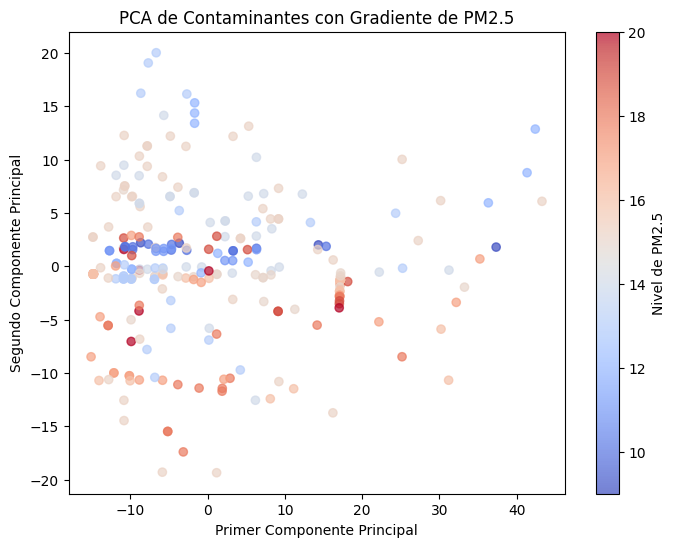

In [11]:
### --- 6. PCA (Análisis de Componentes Principales) --- ###
def pca(df):
    contaminantes = ['so2', 'no2', 'o3', 'pm10', 'pm25']

    # Aplicar PCA
    pca_model = PCA(n_components=2)
    componentes = pca_model.fit_transform(df[contaminantes])

    # Convertir a DataFrame para mejor manipulación
    pca_df = pd.DataFrame(componentes, columns=["PC1", "PC2"])
    pca_df["pm25"] = df["pm25"]  # Agregar contaminación como referencia de color
    pca_df["tipozona"] = df["tipozona"]  # Opcional: agregar etiquetas de tipo de zona

    # Ver la varianza explicada por cada componente**
    print("Varianza explicada por cada componente principal:")
    print(pca_model.explained_variance_ratio_)
    print(f"Varianza total explicada por los 2 componentes: {pca_model.explained_variance_ratio_.sum():.2f}")

    # Ver las cargas (loadings) para interpretar los componentes**
    loadings = pd.DataFrame(pca_model.components_.T, columns=['PC1', 'PC2'], index=contaminantes)
    print("\nCargas (Loadings) de las variables en los componentes principales:")
    print(loadings)

    # Graficar PCA con etiquetas de colores
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["pm25"], cmap="coolwarm", alpha=0.7)

    plt.colorbar(scatter, label="Nivel de PM2.5")
    plt.xlabel("Primer Componente Principal")
    plt.ylabel("Segundo Componente Principal")
    plt.title("PCA de Contaminantes con Gradiente de PM2.5")

    # Opcional: Agregar etiquetas de tipozona en los puntos (desactivado para evitar saturación)
    # for i in range(len(pca_df)):
    #    plt.text(pca_df["PC1"][i], pca_df["PC2"][i], pca_df["tipozona"][i], fontsize=9, alpha=0.6)

    plt.show()

pca(df)

## O visto con otra Perspectiva

<img src="imagenes/PCA_alternativo.jpg" width="900"/>

## Clustering (K-Means)

**Propósito:**
-  Identificar grupos de contaminación similares en distintas zonas.

**Qué observar:**
-  ¿Qué zonas tienen patrones similares?
-  Si los grupos encontrados tienen sentido según la geografía y emisión.

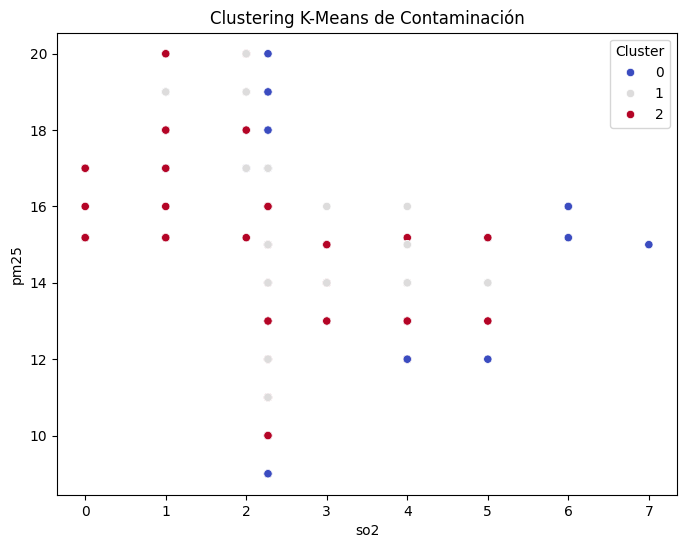

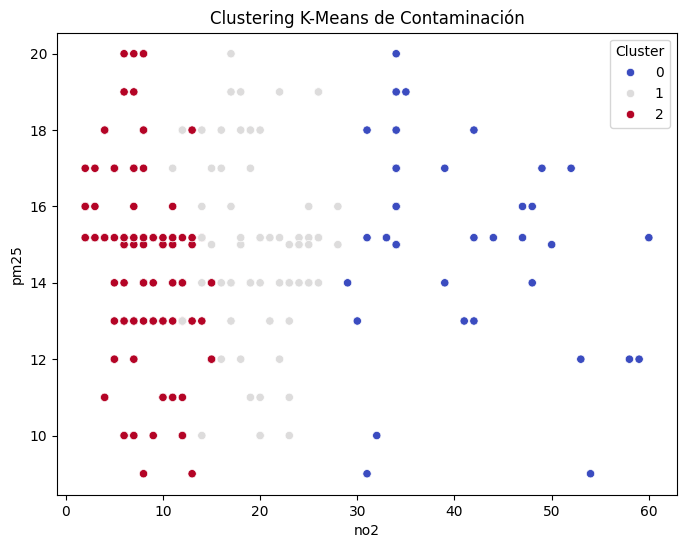

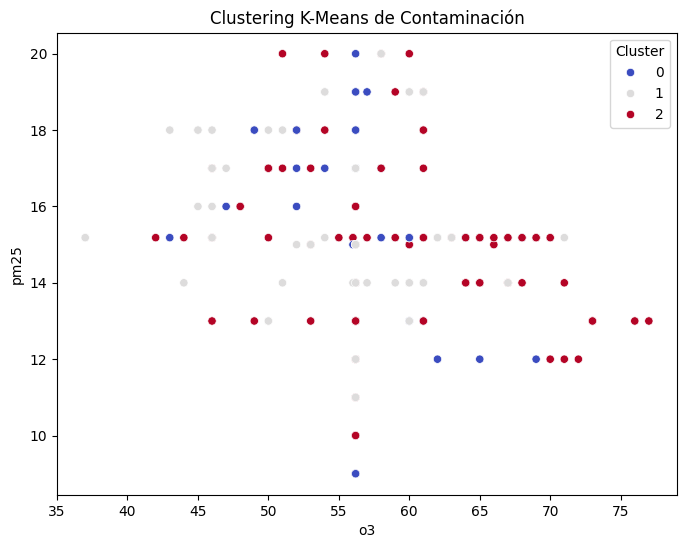

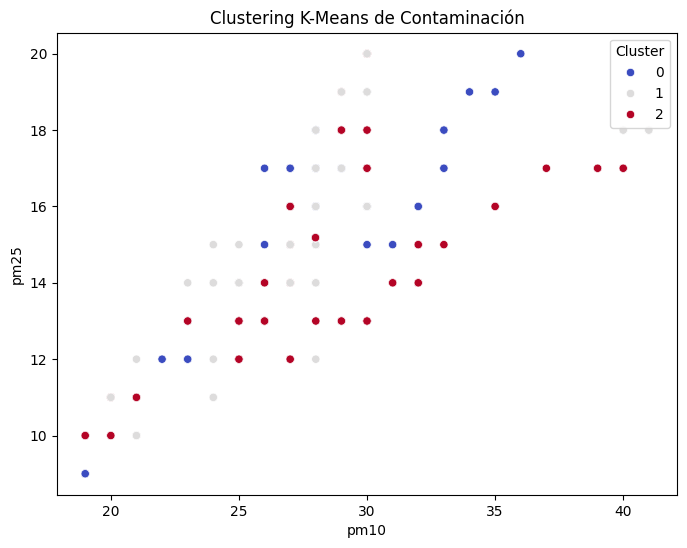

In [12]:

def clustering(df):
    contaminantes = ['so2', 'no2', 'o3', 'pm10']
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[contaminantes])

    for cont in contaminantes:
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=df[cont], y=df['pm25'], hue=df['Cluster'], palette="coolwarm")
        plt.title("Clustering K-Means de Contaminación")
        plt.show()

clustering(df)

## Conclusiones de los Cluster Kmeans vs pm25

**Interpretacion de los clusters**
- El clúster 0 representa condiciones de alta contaminación por partículas.
- El clúster 1 se sitúa en un nivel intermedio.
- El clúster 2 representa condiciones de baja contaminación.

el clustering K-Means ha logrado identificar tres patrones distintos en los datos de contaminación, que se correlacionan en gran medida con diferentes niveles de PM2.5 y las concentraciones de PM10 y NO2.

## Series Temporales (ARIMA)

**Propósito:**
-  Modelar y predecir cambios en la contaminación con el tiempo. 

**Qué observar:**
-  Tendencias de aumento/disminución en contaminantes.
-  Predicciones futuras basadas en patrones históricos.

                               SARIMAX Results                                
Dep. Variable:                   pm25   No. Observations:                  275
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -616.486
Date:                Fri, 13 Jun 2025   AIC                           1236.971
Time:                        19:45:31   BIC                           1244.197
Sample:                             0   HQIC                          1239.871
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9552      0.020    -47.653      0.000      -0.995      -0.916
sigma2         5.2233      0.453     11.541      0.000       4.336       6.110
Ljung-Box (L1) (Q):                   1.48   Jarque-

C:\Users\bonaf\anaconda3\envs\mi_entorno_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bonaf\anaconda3\envs\mi_entorno_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bonaf\anaconda3\envs\mi_entorno_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bonaf\anaconda3\envs\mi_entorno_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

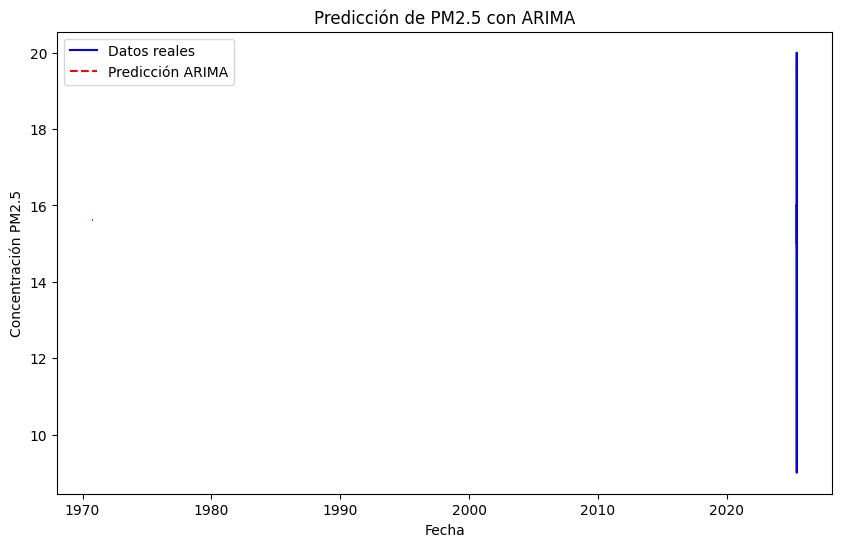

In [13]:
import statsmodels.api as sm

def arima_model(df):
    df.sort_values("fecha_carg", inplace=True)
    df.set_index("fecha_carg", inplace=True)  # Usamos la fecha como índice

    modelo = sm.tsa.ARIMA(df['pm25'], order=(0, 1, 1))  # Orden personalizado luego de varias pruebas
    resultado = modelo.fit()

    # Mostrar resumen del modelo ARIMA
    print(resultado.summary())

    # Predicción en el período siguiente
    predicciones = resultado.predict(start=len(df), end=len(df)+30, typ="levels")

    # Visualización de los datos históricos y predicciones
    plt.figure(figsize=(10,6))
    plt.plot(df.index, df["pm25"], label="Datos reales", color="blue")
    plt.plot(predicciones.index, predicciones, label="Predicción ARIMA", linestyle="dashed", color="red")
    plt.title("Predicción de PM2.5 con ARIMA")
    plt.xlabel("Fecha")
    plt.ylabel("Concentración PM2.5")
    plt.legend()
    plt.show()

df_arima = df.copy(deep=True)
arima_model(df_arima)

## Análisis del Modelo ARIMA(0, 1, 1) para PM2.5

El modelo ARIMA tiene un orden (0, 1, 1). Esto significa:

-  AR (AutoRegresivo) orden 0: No utiliza valores de PM2.5 de periodos anteriores.

-  I (Integrado) orden 1: Se ha aplicado una diferenciación de primer orden para hacer la serie estacionaria.

-  MA (Media Móvil) orden 1: El modelo utiliza el error de pronóstico del periodo anterior para predecir el valor actual.

Este es el mejor modelo de 4 que se probaron

## Análisis de Impacto

**Propósito:**
-  Evaluar cambios en la contaminación antes y después de un evento ambiental.

**Qué observar:** 

-  Diferencias significativas antes/después del evento.
-  Si hay reducción o aumento en contaminantes específicos.

Impacto promedio en PM2.5 antes y después del evento:
evento
False    15.222392
True     14.579429
Name: pm25, dtype: float64


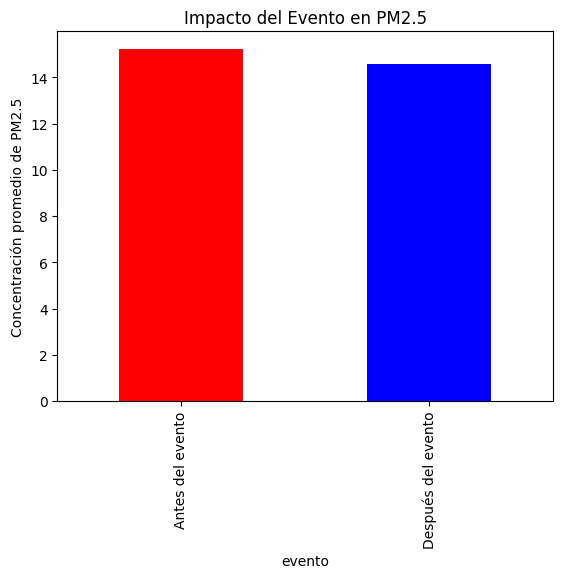

In [14]:
def analisis_impacto(df, evento_fecha):
    df_fecha["evento"] = df_fecha["fecha_carg"] >= evento_fecha  # Variable categórica antes/después del evento
    
    impacto_pm25 = df_fecha.groupby("evento")["pm25"].mean()
    print("Impacto promedio en PM2.5 antes y después del evento:")
    print(impacto_pm25)

    impacto_pm25.plot(kind="bar", title="Impacto del Evento en PM2.5", color=["red", "blue"])
    plt.ylabel("Concentración promedio de PM2.5")
    plt.xticks(ticks=[0, 1], labels=["Antes del evento", "Después del evento"])
    plt.show()

evento_fecha = "2025-06-10"  # Fecha del evento a analizar es el medio de los 3 dias
df_fecha = df.copy(deep=True)
analisis_impacto(df_fecha, evento_fecha)

## Resultados de la aplicación del Analisis de Impacto

la gráfica muestra una leve disminución en PM2.5 después del día del evento central, pero debido al periodo de análisis extremadamente corto (3 días), esta observación debe tomarse como una indicación preliminar y no como una conclusión definitiva de un impacto real del evento.

## Análisis de Causa y Efecto

**Propósito:**

-  Identificar qué contaminantes afectan directamente la calidad del aire.

**Qué observar:** 

-  Relación entre emisión y calidad ambiental.
-  Si ciertas variables explican mejor los cambios en la calidad del aire.

In [15]:
import statsmodels.formula.api as smf

def causa_efecto(df):
    # Verificar si la columna calidad_am es categórica y transformarla a numérica
    if df["calidad_am"].dtype == "object":
        encoder = LabelEncoder()
        df["calidad_am_num"] = encoder.fit_transform(df["calidad_am"])

        # Crear un DataFrame para mostrar el mapeo
        mapeo_calidad = pd.DataFrame({
            'calidad_am_original': encoder.classes_,
            'calidad_am_numerico': range(len(encoder.classes_))
        })
        print(mapeo_calidad)
        print("\nNotas: Los números son asignados por orden alfabético por LabelEncoder.")
        print("Un número más alto NO significa necesariamente mejor/peor calidad a menos que los valores originales ya estuvieran en ese orden alfabético.")
        print("-------------------------------------------\n")

    # Ajustar modelo de regresión
    modelo = smf.ols("calidad_am_num ~ so2 + no2 + o3 + pm10 + pm25", data=df).fit()
    print(modelo.summary())

causa_efecto(df)

    calidad_am_original  calidad_am_numerico
0                 Buena                    0
1  Razonablemente Buena                    1
2               Regular                    2

Notas: Los números son asignados por orden alfabético por LabelEncoder.
Un número más alto NO significa necesariamente mejor/peor calidad a menos que los valores originales ya estuvieran en ese orden alfabético.
-------------------------------------------

                            OLS Regression Results                            
Dep. Variable:         calidad_am_num   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     20.87
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           1.29e-17
Time:                        19:45:49   Log-Likelihood:                 6.6784
No. Observations:                 275   AIC:                            -1.357
Df Residu

## Conclusiónes del analisis de Causa y Efectos

- PM10 es un predictor significativo y lógico: Un aumento en PM10 se asocia con una disminución en la calidad del aire (es decir, el aire se vuelve "peor"). Esta es una conclusión clave y esperada del modelo.

-  Otros contaminantes no son significativos en este modelo: SO2, NO2, O3 y PM25 no muestran una relación estadísticamente significativa con la calidad del aire (calidad_am_num) una vez que PM10 está en el modelo.

-  Debido a que pm10 y pm25 estén altamente correlacionadas. Esta alta correlación hace que sea difícil para el modelo distinguir el efecto individual de cada una, y podría estar "opacando" la significancia de pm25 por lo que se podria eliminar la variable pm10 para la ejecucion del modelo.

Se efectuo este cambio y se obtuvo:

<img src="imagenes/Causa_efecto_pm25.jpg" width="600"/>

1. Pérdida de Poder Explicativo: La eliminación de pm10 ha resultado en una reducción drástica de la capacidad del modelo para explicar la variabilidad en la calidad del aire (R-cuadrado de 0.274 a 0.093). Esto subraya la importancia de pm10 como predictor en el contexto de tu dataset original.
2. pm25 sigue sin ser significativo: A pesar de ser una partícula fina y un contaminante clave para la salud y la calidad del aire, pm25 sigue sin ser estadísticamente significativo en este modelo

## Visualización Geoespacial

**Propósito:** 

-  Representar geográficamente la contaminación para identificar zonas críticas.
  
**Qué observar:** 

-  Mapas de calor (zonas con mayor contaminación).
-  Distribución de puntos para entender qué áreas requieren intervención.

In [16]:

def mapa_geoespacial(df):
    # Crear mapa centrado en una ubicación de referencia
    mapa = folium.Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=12)

    # Agregar puntos con marcadores y color según contaminación
    for _, row in df.iterrows():
        color = "red" if row["pm25"] > 50 else "orange" if row["pm25"] > 30 else "green"
        folium.CircleMarker(
            location=[row["lat"], row["lon"]],
            radius=7,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"{row['nombre']} - PM2.5: {row['pm25']}"
        ).add_to(mapa)

    # Guardar mapa y mostrar
    mapa.save("mapa_contaminacion.html")
    print("Mapa generado: mapa_contaminacion.html")

mapa_geoespacial(df)

Mapa generado: mapa_contaminacion.html


In [17]:
from IPython.display import IFrame
IFrame("mapa_contaminacion.html", width=800, height=600)

In [18]:
def mapa_calor(df):
    # Crear mapa base centrado en la zona promedio de los datos
    mapa = folium.Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=12)

    # Preparar datos para el mapa de calor
    heat_data = df[['lat', 'lon', 'pm25']].dropna().values.tolist()

    # Agregar capa de calor al mapa
    HeatMap(heat_data, radius=10).add_to(mapa)

    # Guardar mapa y mostrar
    mapa.save("mapa_calor_contaminacion.html")
    print("Mapa de calor generado: mapa_calor_contaminacion.html")

mapa_calor(df)

Mapa de calor generado: mapa_calor_contaminacion.html


In [19]:
IFrame("mapa_calor_contaminacion.html", width=800, height=600)